<a href="https://colab.research.google.com/github/khonayem/HR-Dataset/blob/main/HR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

import warnings


In [92]:
df = pd.read_csv('HR Dataset.csv')
df


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [93]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [94]:
df.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [96]:
df.shape

(311, 36)

Drop irrelavant columns in the datase:

'EmpID', 'MarriedID', 'MaritalStatusID',
       'EmpStatusID', 'DeptID', 'Termd','Zip','ManagerID','DaysLateLast30',
       'Absences',

In [97]:
df = df.drop(['EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID', 'DeptID', 'Termd','Zip','ManagerID','DaysLateLast30', 'Absences'], axis=1)

In [98]:
df.describe()

,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.434084,2.977492,0.093248,69020.684887,16.845659,4.110000,3.890675,1.218650
std,0.496435,0.587072,0.291248,25156.636930,6.223419,0.789938,0.909241,2.349421
min,0.000000,1.000000,0.000000,45046.000000,1.000000,1.120000,1.000000,0.000000
25%,0.000000,3.000000,0.000000,55501.500000,18.000000,3.690000,3.000000,0.000000
50%,0.000000,3.000000,0.000000,62810.000000,19.000000,4.280000,4.000000,0.000000
75%,1.000000,3.000000,0.000000,72036.000000,20.000000,4.700000,5.000000,0.000000
max,1.000000,4.000000,1.000000,250000.000000,30.000000,5.000000,5.000000,8.000000


**1.Is there any relationship between who a person works for and their performance score?

In [99]:
df_perfscore = df['PerfScoreID'].value_counts()
df_perfscore

,count
PerfScoreID,
3,243
4,37
2,18
1,13


These are the total number of managers

In [100]:
df['ManagerName'].nunique()

21

We calculate the number of managers with the highest to lowest performers from a rting of 1 to 4

In [101]:
Score4_manager = df.query("PerfScoreID==4")["ManagerName"]
Score3_manager = df.query("PerfScoreID==3")["ManagerName"]
Score2_manager = df.query("PerfScoreID==3")["ManagerName"]
Score1_manager = df.query("PerfScoreID==1")["ManagerName"]

In [102]:
Score4_manager.sort_values(ascending=True).value_counts()

,count
ManagerName,
Brannon Miller,7
Janet King,4
Amy Dunn,3
Kelley Spirea,3
Alex Sweetwater,2
Elijiah Gray,2
Jennifer Zamora,2
Ketsia Liebig,2
Kissy Sullivan,2


Here we see each manager with the 4 rating employees with visualisation

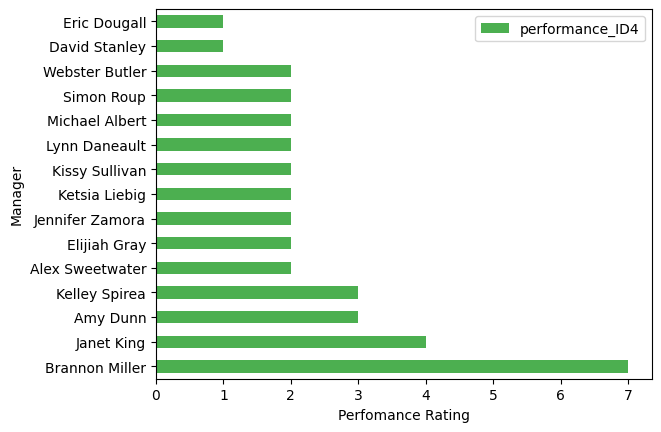

In [103]:
score4_df = {
  "Manager": ('Brannon Miller','Janet King','Amy Dunn','Kelley Spirea','Alex Sweetwater','Elijiah Gray','Jennifer Zamora',
              'Ketsia Liebig','Kissy Sullivan','Lynn Daneault','Michael Albert','Simon Roup','Webster Butler','David Stanley','Eric Dougall'),
  "performance_ID4": [7, 4,	3,	3,	2,	2,	2,	2,	2,	2,	2,	2,	2,	1,	1,]
}
score4_df = pd.DataFrame(score4_df)
score4_df.plot.barh(x='Manager', y='performance_ID4',color = "#4CAF50")
plt.xlabel("Perfomance Rating")
plt.show()

In [104]:
Score3_manager.sort_values(ascending=True).value_counts()

,count
ManagerName,
David Stanley,19
Kissy Sullivan,18
Ketsia Liebig,18
Elijiah Gray,18
Kelley Spirea,18
Webster Butler,17
Michael Albert,16
Amy Dunn,15
Simon Roup,15


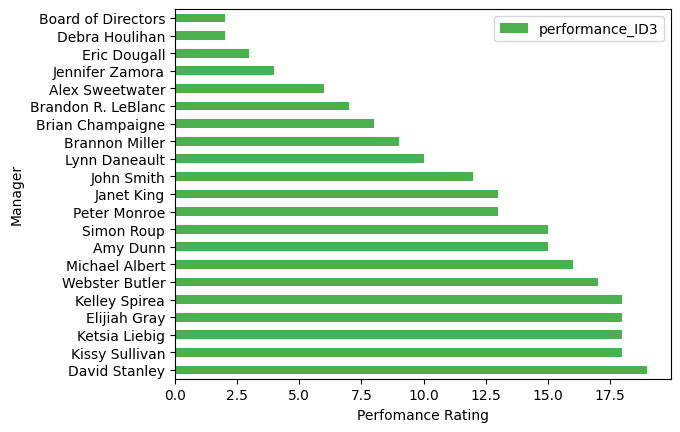

In [105]:
score3_df = {
  "Manager": ('David Stanley','Kissy Sullivan','Ketsia Liebig','Elijiah Gray','Kelley Spirea','Webster Butler','Michael Albert','Amy Dunn','Simon Roup'
              ,'Peter Monroe','Janet King','John Smith','Lynn Daneault','Brannon Miller','Brian Champaigne','Brandon R. LeBlanc','Alex Sweetwater',
              'Jennifer Zamora','Eric Dougall','Debra Houlihan','Board of Directors'),
  "performance_ID3": [19,18,18,18,18,17,16,15,15,13,13,12,10,9,8,7,6,4,3,2,2]
}
score3_df = pd.DataFrame(score3_df)
score3_df.plot.barh(x='Manager', y='performance_ID3',color = "#4CAF50")
plt.xlabel("Perfomance Rating")
plt.show()

In [106]:
Score2_manager.sort_values(ascending=True).value_counts()

,count
ManagerName,
David Stanley,19
Kissy Sullivan,18
Ketsia Liebig,18
Elijiah Gray,18
Kelley Spirea,18
Webster Butler,17
Michael Albert,16
Amy Dunn,15
Simon Roup,15


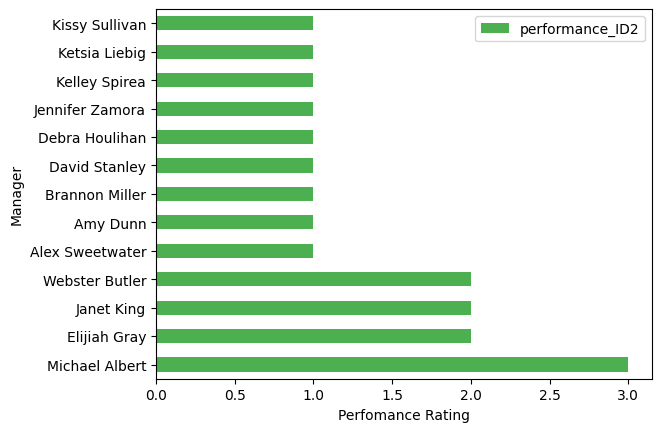

In [107]:
score2_df = {
  "Manager": ('Michael Albert','Elijiah Gray','Janet King','Webster Butler','Alex Sweetwater','Amy Dunn','Brannon Miller','David Stanley','Debra Houlihan',
              'Jennifer Zamora','Kelley Spirea','Ketsia Liebig','Kissy Sullivan'),
  "performance_ID2": [3,2,2,2,1,1,1,1,1,1,1,1,1,]
}
score2_df = pd.DataFrame(score2_df)
score2_df.plot.barh(x='Manager', y='performance_ID2',color = "#4CAF50")
plt.xlabel("Perfomance Rating")
plt.show()

In [108]:
Score1_manager.sort_values(ascending=True).value_counts()

,count
ManagerName,
Brannon Miller,5
Amy Dunn,2
John Smith,2
Kissy Sullivan,1
Lynn Daneault,1
Michael Albert,1
Peter Monroe,1


1.Is there any relationship between who a person works for and their performance score?

Brannon Miller had the most people with 4 rating performance which is 7 followed by Janet King and Amy Dunn with a rating of 4 and 3 respectively.

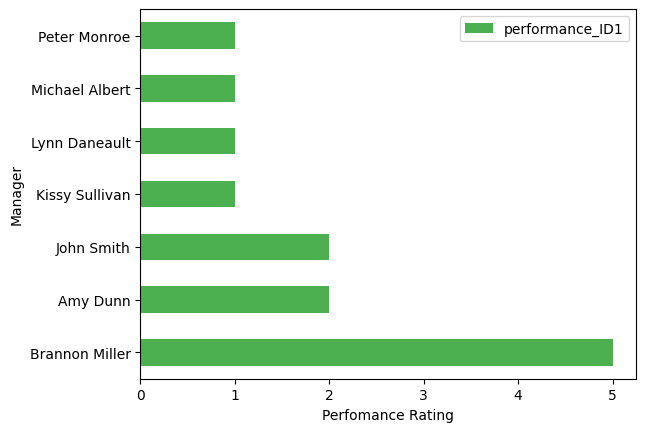

In [109]:
score1_df = {
  "Manager": ('Brannon Miller', 'Amy Dunn', 'John Smith','Kissy Sullivan','Lynn Daneault','Michael Albert','Peter Monroe'),
  "performance_ID1": [5, 2, 2, 1, 1, 1, 1]
}
score1_df = pd.DataFrame(score1_df)
score1_df.plot.barh(x='Manager', y='performance_ID1',color = "#4CAF50")
plt.xlabel("Perfomance Rating")
plt.show()

In [110]:
performance_table = pd.concat([score1_df,score2_df,score3_df,score4_df], axis=1)

In [111]:
performance_table

,Manager,performance_ID1,Manager,performance_ID2,Manager,performance_ID3,Manager,performance_ID4
0,Brannon Miller,5.0,Michael Albert,3.0,David Stanley,19,Brannon Miller,7.0
1,Amy Dunn,2.0,Elijiah Gray,2.0,Kissy Sullivan,18,Janet King,4.0
2,John Smith,2.0,Janet King,2.0,Ketsia Liebig,18,Amy Dunn,3.0
3,Kissy Sullivan,1.0,Webster Butler,2.0,Elijiah Gray,18,Kelley Spirea,3.0
4,Lynn Daneault,1.0,Alex Sweetwater,1.0,Kelley Spirea,18,Alex Sweetwater,2.0
5,Michael Albert,1.0,Amy Dunn,1.0,Webster Butler,17,Elijiah Gray,2.0
6,Peter Monroe,1.0,Brannon Miller,1.0,Michael Albert,16,Jennifer Zamora,2.0
7,NaN,NaN,David Stanley,1.0,Amy Dunn,15,Ketsia Liebig,2.0
8,NaN,NaN,Debra Houlihan,1.0,Simon Roup,15,Kissy Sullivan,2.0
9,NaN,NaN,Jennifer Zamora,1.0,Peter Monroe,13,Lynn Daneault,2.0


2.What is the overall diversity profile of the organization?

In [112]:
diversity = df["RaceDesc"].value_counts().sum()
diversity

311

In [113]:
df["RaceDesc"].value_counts()/diversity*100

,count
RaceDesc,
White,60.128617
Black or African American,25.723473
Asian,9.324759
Two or more races,3.536977
American Indian or Alaska Native,0.964630
Hispanic,0.321543


The diversity of the organisation:

*   White 60.13%
*   Black or African American 25.72%
*   Asian 9.32%
*   Two or more races 3.54%
*   American Indian or Alaska Native 0.96%
*   Hispanic 0.32%  

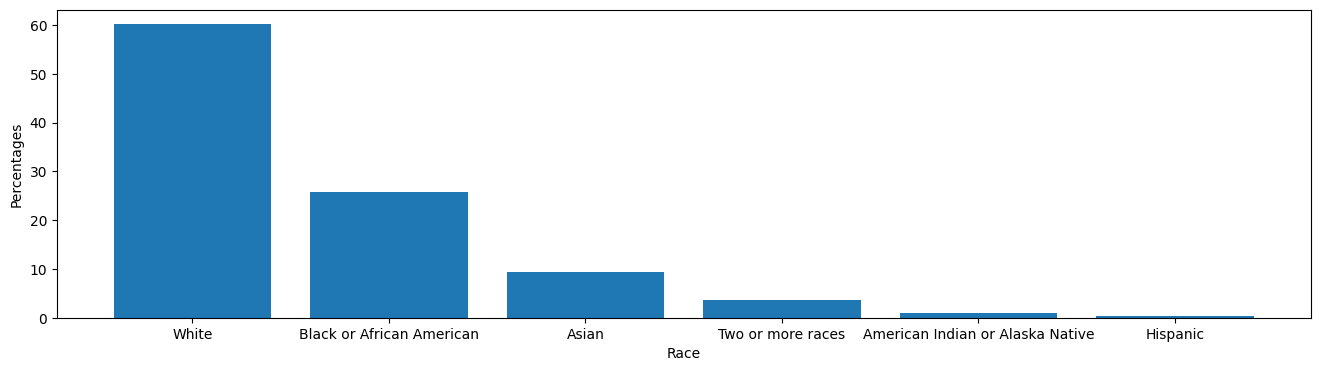

In [114]:
Race = ['White','Black or African American','Asian','Two or more races','American Indian or Alaska Native','Hispanic']
Percentages = [60.12,25.72,9.32,3.53,0.96,0.32]

plt.figure(figsize=(55, 4))
plt.subplot(131)
plt.bar(Race, Percentages)
plt.xlabel("Race")
plt.ylabel("Percentages")
plt.show()

3.What are our best recruiting sources if we want to ensure a diverse organization?

In [115]:
df["RecruitmentSource"].value_counts()/len(df)*100

,count
RecruitmentSource,
Indeed,27.974277
LinkedIn,24.437299
Google Search,15.755627
Employee Referral,9.967846
Diversity Job Fair,9.324759
CareerBuilder,7.395498
Website,4.180064
Other,0.643087
On-line Web application,0.321543


Calculate the mean score on race and in order to get a more balance and diverse percentage to recruit from in order to achieve a more diverse employees

In [116]:
data_list = pd.DataFrame({'race_desc': [60,26,9,4,1,0.3],
            'recruit_score': [27.97,24,16,10,9,7.39]})
data_list

,race_desc,recruit_score
0,60.0,27.97
1,26.0,24.00
2,9.0,16.00
3,4.0,10.00
4,1.0,9.00
5,0.3,7.39


In [117]:
data_list["race_desc"].mean()

16.716666666666665

In [118]:
data_list.mean()

,0
race_desc,16.716667
recruit_score,15.726667


The most fair percentage to recruit from would be an avareg of 16.71% across the recruitment channels

4.Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?

We have to convert the date columns correctly as datetime instead of an object, then we have to calaculate years of service by subtracting last day of review from date of hire as a reasonable assumption.

In [119]:
df.loc[:,["Employee_Name","SpecialProjectsCount","DateofHire","LastPerformanceReview_Date"]].sort_values(by='SpecialProjectsCount', ascending=False)

,Employee_Name,SpecialProjectsCount,DateofHire,LastPerformanceReview_Date
61,"Daniele, Ann",8,11/10/2014,2/12/2019
299,"Warfield, Sarah",8,3/30/2015,2/5/2019
243,"Roup,Simon",7,1/20/2013,2/18/2019
254,"Simard, Kramer",7,1/5/2015,1/14/2019
25,"Booth, Frank",7,2/17/2014,1/10/2016
...,...,...,...,...
126,"Heitzman, Anthony",0,8/13/2012,2/11/2019
127,"Hendrickson, Trina",0,1/10/2011,1/30/2013
128,"Hitchcock, Alfred",0,8/18/2014,1/30/2019
129,"Homberger, Adrienne J",0,8/15/2011,3/5/2012


In [120]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])

We are now going to insert a new column of years of service

In [121]:
df['YearOfService'] = (df['LastPerformanceReview_Date'] - df['DateofHire']).dt.days/365

In [122]:
df.loc[:,["Employee_Name","SpecialProjectsCount","YearOfService","DateofHire","LastPerformanceReview_Date"]].sort_values(by='SpecialProjectsCount', ascending=False)

,Employee_Name,SpecialProjectsCount,YearOfService,DateofHire,LastPerformanceReview_Date
61,"Daniele, Ann",8,4.260274,2014-11-10,2019-02-12
299,"Warfield, Sarah",8,3.857534,2015-03-30,2019-02-05
243,"Roup,Simon",7,6.082192,2013-01-20,2019-02-18
254,"Simard, Kramer",7,4.027397,2015-01-05,2019-01-14
25,"Booth, Frank",7,1.895890,2014-02-17,2016-01-10
...,...,...,...,...,...
126,"Heitzman, Anthony",0,6.501370,2012-08-13,2019-02-11
127,"Hendrickson, Trina",0,2.057534,2011-01-10,2013-01-30
128,"Hitchcock, Alfred",0,4.454795,2014-08-18,2019-01-30
129,"Homberger, Adrienne J",0,0.556164,2011-08-15,2012-03-05


In [123]:
employee_serv = df.loc[:,["Employee_Name","Salary","SpecialProjectsCount","YearOfService","PerfScoreID","Department","EmpSatisfaction","DateofHire","LastPerformanceReview_Date",]].sort_values(by='Department', ascending=True)
employee_serv

,Employee_Name,Salary,SpecialProjectsCount,YearOfService,PerfScoreID,Department,EmpSatisfaction,DateofHire,LastPerformanceReview_Date
160,"LaRotonda, William",64520,4,5.032877,3,Admin Offices,4,2014-01-06,2019-01-17
268,"Steans, Tyrone",63003,5,4.306849,3,Admin Offices,5,2014-09-29,2019-01-18
259,"Smith, Leigh Ann",55000,4,1.887671,3,Admin Offices,4,2011-09-26,2013-08-15
255,"Singh, Nan",51920,5,3.712329,3,Admin Offices,3,2015-05-01,2019-01-15
29,"Brown, Mia",63000,6,10.224658,3,Admin Offices,2,2008-10-27,2019-01-15
...,...,...,...,...,...,...,...,...,...
285,"True, Edward",100416,4,3.986301,3,Software Engineering,3,2013-02-18,2017-02-12
37,"Carabbio, Judith",93396,6,5.221918,3,Software Engineering,4,2013-11-11,2019-01-30
274,"Szabo, Andrew",92989,5,4.621918,4,Software Engineering,5,2014-07-07,2019-02-18
212,"Patronick, Lucas",108987,3,3.775342,4,Software Engineering,5,2011-11-07,2015-08-16


In [129]:
value = 'Active'
active_employees = df[df['EmploymentStatus'] == value]
active_employees

,Employee_Name,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,PositionID,Position,State,DOB,Sex,...,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,YearOfService
0,"Adinolfi, Wilson K",1,4,0,62506,19,Production Technician I,MA,7/10/1983,M,...,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,7.542466
3,"Alagbe,Trina",0,3,0,64991,19,Production Technician I,MA,9/27/1988,F,...,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,10.997260
5,"Anderson, Linda",0,4,0,57568,19,Production Technician I,MA,5/22/1977,F,...,Active,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,0,2019-01-07,7.000000
6,"Andreola, Colby",0,3,0,95660,24,Software Engineer,MA,5/24/1979,F,...,Active,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,4,2019-01-02,4.147945
7,"Athwal, Sam",1,3,0,59365,19,Production Technician I,MA,2/18/1983,M,...,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,0,2019-02-25,5.408219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",0,3,0,60446,20,Production Technician II,MA,4/20/1985,F,...,Active,Production,David Stanley,LinkedIn,Fully Meets,3.40,4,0,2019-02-21,4.400000
306,"Woodson, Jason",1,3,0,65893,20,Production Technician II,MA,5/11/1985,M,...,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,4.649315
308,"Zamora, Jennifer",0,4,0,220450,6,CIO,MA,8/30/1979,F,...,Active,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,6,2019-02-21,8.873973
309,"Zhou, Julia",0,3,0,89292,9,Data Analyst,MA,2/24/1979,F,...,Active,IT/IS,Simon Roup,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,3.846575


In [138]:
total_employees =len(df)
total_employees

311

In [152]:
left_emp = len(df) - len(active_employees)
left_emp

104

In [154]:
stayed_emp = len(active_employees)
stayed_emp

207

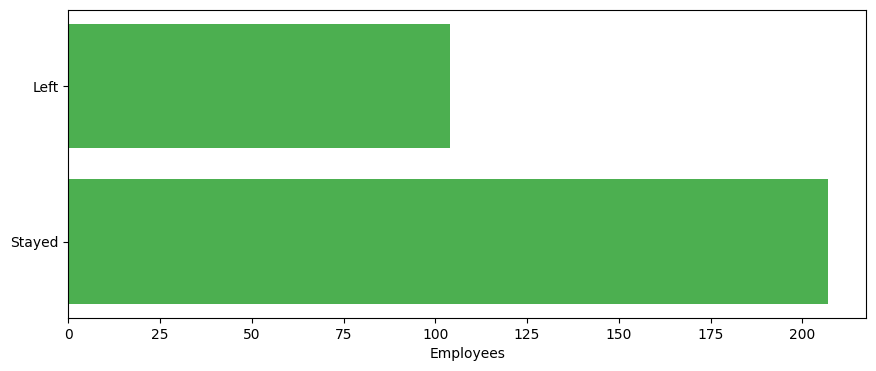

In [178]:
Stayed = [207]
Left = [104]
plt.figure(figsize=(35, 4))
plt.subplot(131)
x = np.array(["Stayed", "Left",])
y = np.array([207,104])
plt.xlabel("Employees")
plt.barh(x, y, color = "#4CAF50")
plt.show()

Which Department employess left the company most?

In [221]:
active_employees["Department"].value_counts()

,count
Department,
Production,126
IT/IS,40
Sales,26
Software Engineering,7
Admin Offices,7
Executive Office,1


In [217]:
value = 'Voluntarily Terminated'
vol_left = df[df['EmploymentStatus'] == value]

In [218]:
vol_left["Department"].value_counts()/len(df)*100

,count
Department,
Production,24.115756
IT/IS,1.929260
Sales,0.964630
Software Engineering,0.964630
Admin Offices,0.321543


In [215]:
value = 'Terminated for Cause'
term_cause = df[df['EmploymentStatus'] == value]

In [219]:
term_cause["Department"].value_counts()/len(df)*100

,count
Department,
Production,2.572347
IT/IS,1.286174
Sales,0.643087
Software Engineering,0.321543
Admin Offices,0.321543


Can we predict who is going to terminate and who isn't?

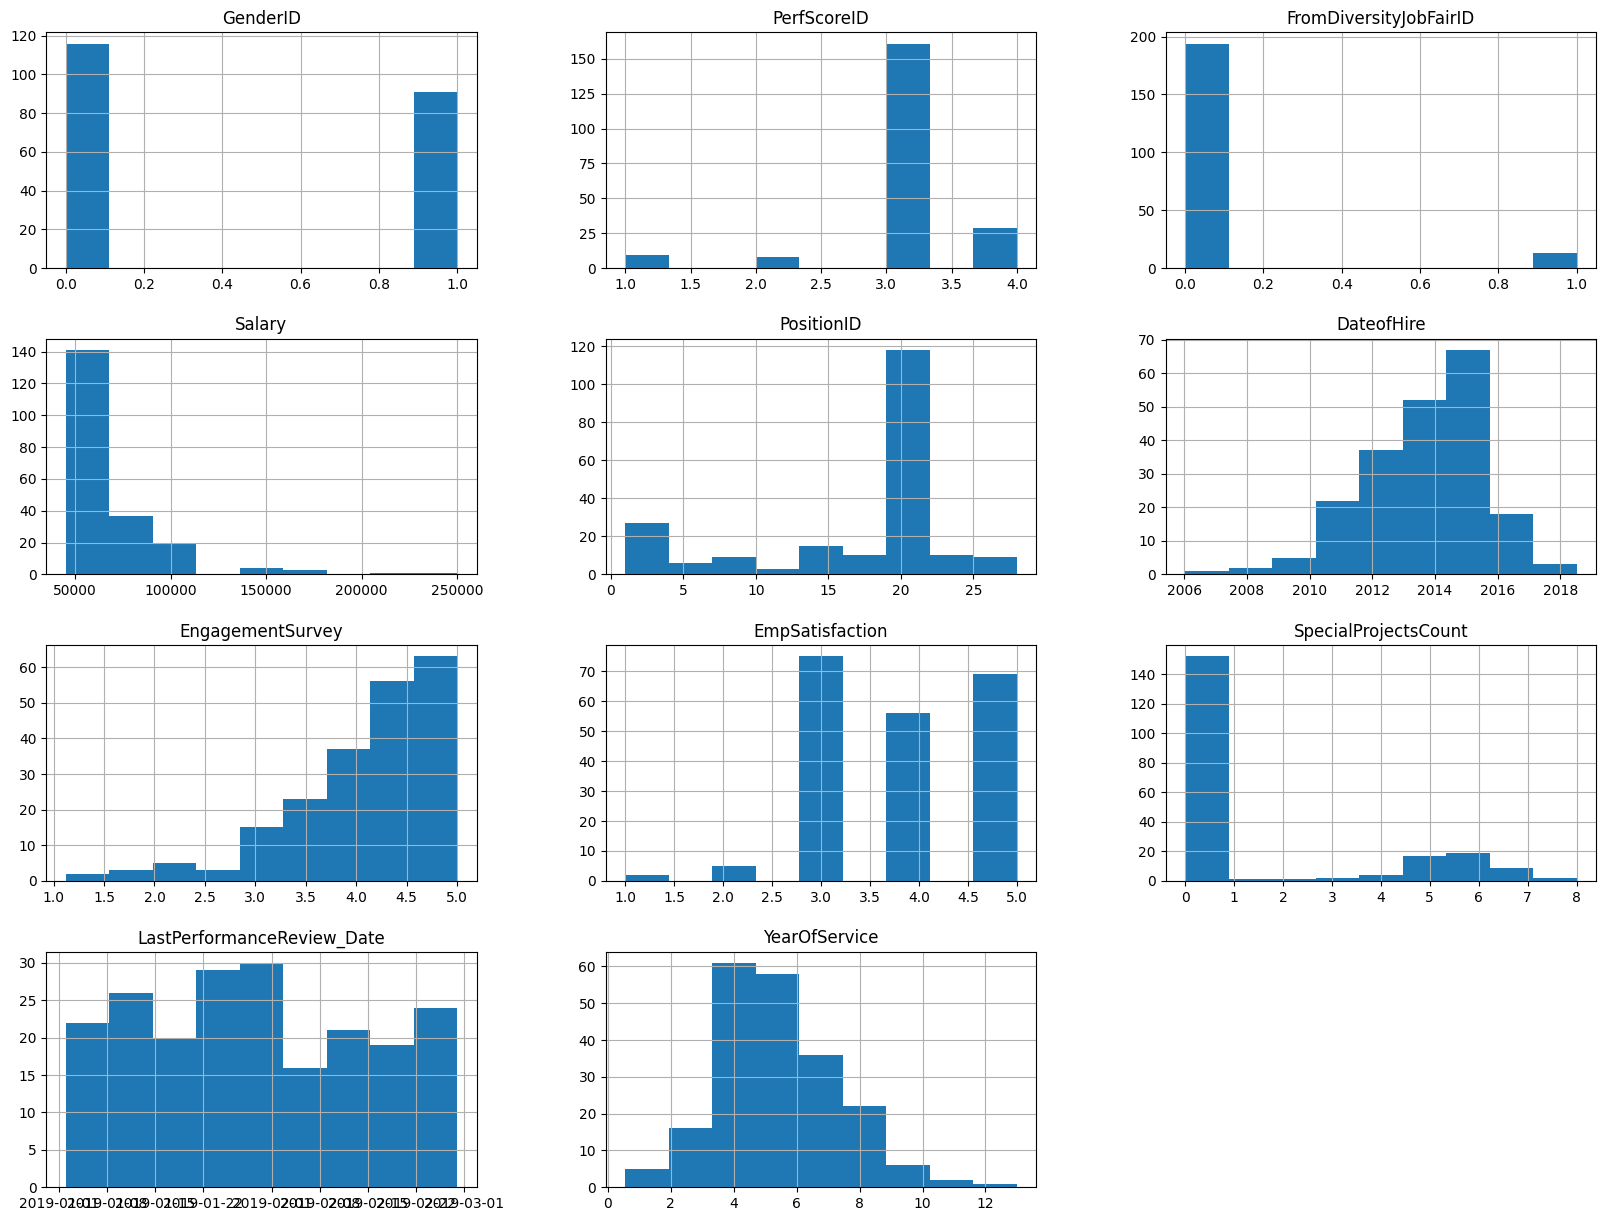

In [230]:
num_bins = 9
active_employees.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

Let us combine “terminated for cause”, and “Voluntarily Terminated” together and call them “terminated”.